# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


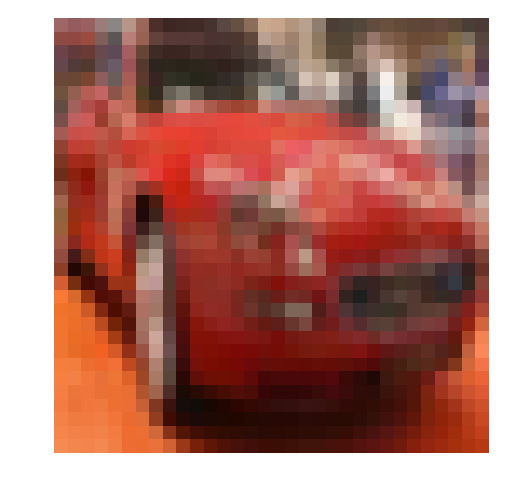

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [4]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [5]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit([0,1,2,3,4,5,6,7,8,9])

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return encoder.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [4]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    #print([None,image_shape[0],image_shape[1],image_shape[2]])
    tf_shape = [None,image_shape[0],image_shape[1],image_shape[2]]
    return tf.placeholder(tf.float32, shape = tf_shape, name = 'x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    #print([None, n_classes])
    return tf.placeholder(tf.float32, shape = [None, n_classes], name = 'y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name = 'keep_prob') 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [200]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #print(x_tensor.get_shape())
    #print(conv_num_outputs)
    #print(conv_ksize)
    #print(conv_strides)
    #print(pool_ksize)
    #print(pool_strides)

    output_depth  = conv_num_outputs
    input_depth   = x_tensor.get_shape()[3].value
    
    # weight & bias
    weight = tf.Variable(tf.truncated_normal([conv_ksize[0],conv_ksize[1],input_depth,output_depth],mean=0.0, stddev=0.05, dtype=tf.float32))
    #print(weight.get_shape()) ##debug
    bias = tf.Variable(tf.truncated_normal([output_depth],mean=0.0, stddev=0.05, dtype=tf.float32))
    
    conv_strides    = [1, conv_strides[0], conv_strides[1], 1]
    maxpool_strides = [1, pool_strides[0], pool_strides[1], 1]
    maxpool_ksize   = [1, pool_ksize[0], pool_ksize[1], 1]
    
    # convolution
    conv = tf.nn.conv2d(x_tensor, weight, strides = conv_strides, padding = 'SAME')
    #print(conv.get_shape()) ##debug
    conv = tf.nn.bias_add(conv,bias)
    conv = tf.nn.relu(conv)
    
    #max pooling
    #print(conv.get_shape()) ##debug
    max_pool = tf.nn.max_pool(conv, ksize = maxpool_ksize, strides = maxpool_strides, padding = 'SAME')
    #print(max_pool.get_shape()) ##debug
    return max_pool 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [201]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    x_tensor_dim = x_tensor.get_shape().as_list()[1:]
    flattened_size = x_tensor_dim[0] * x_tensor_dim[1] * x_tensor_dim[2]   
    
    return tf.reshape(x_tensor, [-1, flattened_size])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [202]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    #print(x_tensor.get_shape())
    
    # weight & bias
    w = tf.Variable(tf.truncated_normal([x_tensor.get_shape()[1].value, num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    bias = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
           
    return tf.add(tf.matmul(x_tensor,w),bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [203]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    #print(x_tensor.get_shape()[1].value)
    
    # weight & bias
    weigth_out = tf.Variable(tf.truncated_normal([x_tensor.get_shape()[1].value, num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    bias_out = tf.Variable(tf.truncated_normal([num_outputs],mean=0.0, stddev=0.05, dtype=tf.float32))
    
    output_layer = tf.add(tf.matmul(x_tensor, weigth_out), bias_out)
    
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [204]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    conv_num_outputs = 32
    conv_ksize = [3,3]
    conv_strides = [1,1]
    pool_ksize = [3,3]
    pool_strides = [2,2]
    
    conv = conv2d_maxpool(x, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    conv = tf.nn.dropout(conv, keep_prob)
    
    conv_num_outputs = 64
    pool_strides = [1,1]
    conv = conv2d_maxpool(conv, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    conv = conv2d_maxpool(conv, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    conv = flatten(conv)
    
    
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #num_outputs = 512
    #fc = fully_conn(conv, num_outputs)
    #fc = tf.nn.relu(fc)
    
    num_outputs = 1024
    fc = fully_conn(conv, num_outputs)
    fc = tf.nn.relu(fc)
    
    fc = tf.nn.dropout(fc, keep_prob)
    
    num_outputs = 1024
    fc = fully_conn(fc, num_outputs)
    fc = tf.nn.relu(fc)
    
    
    
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    out = output(fc, 10)
    
    
    # TODO: return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [205]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    session.run(optimizer, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: keep_probability})

    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [206]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    test_valid_size = 256
    
    valid_loss = session.run(cost, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0})
    
    train_loss = session.run(cost, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0})    
    
    train_acc = session.run(accuracy, feed_dict={
        x: feature_batch,
        y: label_batch,
        keep_prob: 1.0})

    valid_acc = session.run(accuracy, feed_dict={
        x: valid_features,
        y: valid_labels,
        keep_prob: 1.0})    

    print('Validation Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
              valid_loss,valid_acc))
    print('Train Loss: {:>10.4f} Train Accuracy: {:.6f}'.format(
              train_loss,train_acc))
            
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [207]:
# TODO: Tune Parameters
epochs = 100
batch_size = 1024
keep_probability = 0.75

## HYPERPARAMETERS TEST HISTORY 
---
#### RUN 1
epochs = 100 batch_size = 512 keep_probability = 0.75

Epoch 100, CIFAR-10 Batch 1:  Validation Loss: 35216.7969 Validation Accuracy: 0.374400
Train Loss: 22322.4883 Train Accuracy: 0.476351

---
#### RUN 2
epochs = 128 batch_size = 512 keep_probability = 0.75

Epoch 128, CIFAR-10 Batch 1:  Validation Loss: 19870.6484 Validation Accuracy: 0.337200
Train Loss: 10584.4189 Train Accuracy: 0.472973

---
#### RUN 3
epochs = 100 batch_size = 1024 keep_probability = 0.75

Epoch 100, CIFAR-10 Batch 1:  Validation Loss: 84251.0312 Validation Accuracy: 0.393200
Train Loss: 61735.8125 Train Accuracy: 0.455446

---
#### RUN 4
epochs = 100 batch_size = 1024 keep_probability = 0.75

Epoch 128, CIFAR-10 Batch 1:  Validation Loss: 77022.4531 Validation Accuracy: 0.374200
Train Loss: 53328.5156 Train Accuracy: 0.455446

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [208]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Validation Loss:     2.2949 Validation Accuracy: 0.122200
Train Loss:     2.2969 Train Accuracy: 0.125000
Epoch  2, CIFAR-10 Batch 1:  Validation Loss:     2.2277 Validation Accuracy: 0.223400
Train Loss:     2.2334 Train Accuracy: 0.206683
Epoch  3, CIFAR-10 Batch 1:  Validation Loss:     1.9723 Validation Accuracy: 0.240400
Train Loss:     2.0041 Train Accuracy: 0.252475
Epoch  4, CIFAR-10 Batch 1:  Validation Loss:     1.8261 Validation Accuracy: 0.333800
Train Loss:     1.8490 Train Accuracy: 0.330446
Epoch  5, CIFAR-10 Batch 1:  Validation Loss:     1.7492 Validation Accuracy: 0.345400
Train Loss:     1.7619 Train Accuracy: 0.353960
Epoch  6, CIFAR-10 Batch 1:  Validation Loss:     1.7514 Validation Accuracy: 0.346000
Train Loss:     1.7701 Train Accuracy: 0.347772
Epoch  7, CIFAR-10 Batch 1:  Validation Loss:     1.7166 Validation Accuracy: 0.346600
Train Loss:     1.7319 Train Accuracy: 0.376238
Epoch  8, CI

Epoch 62, CIFAR-10 Batch 1:  Validation Loss:     1.8212 Validation Accuracy: 0.587200
Train Loss:     0.0897 Train Accuracy: 0.975248
Epoch 63, CIFAR-10 Batch 1:  Validation Loss:     1.7873 Validation Accuracy: 0.596000
Train Loss:     0.0564 Train Accuracy: 0.988861
Epoch 64, CIFAR-10 Batch 1:  Validation Loss:     1.8875 Validation Accuracy: 0.597600
Train Loss:     0.0483 Train Accuracy: 0.992574
Epoch 65, CIFAR-10 Batch 1:  Validation Loss:     2.0107 Validation Accuracy: 0.583200
Train Loss:     0.0483 Train Accuracy: 0.988861
Epoch 66, CIFAR-10 Batch 1:  Validation Loss:     1.9026 Validation Accuracy: 0.590000
Train Loss:     0.0422 Train Accuracy: 0.991337
Epoch 67, CIFAR-10 Batch 1:  Validation Loss:     1.9333 Validation Accuracy: 0.587800
Train Loss:     0.0527 Train Accuracy: 0.986386
Epoch 68, CIFAR-10 Batch 1:  Validation Loss:     1.9583 Validation Accuracy: 0.587000
Train Loss:     0.0574 Train Accuracy: 0.987624
Epoch 69, CIFAR-10 Batch 1:  Validation Loss:     1.820

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [209]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Validation Loss:     2.2917 Validation Accuracy: 0.133000
Train Loss:     2.2915 Train Accuracy: 0.128713
Epoch  1, CIFAR-10 Batch 2:  Validation Loss:     2.2281 Validation Accuracy: 0.193200
Train Loss:     2.2192 Train Accuracy: 0.212871
Epoch  1, CIFAR-10 Batch 3:  Validation Loss:     2.1364 Validation Accuracy: 0.208000
Train Loss:     2.1284 Train Accuracy: 0.219059
Epoch  1, CIFAR-10 Batch 4:  Validation Loss:     1.9590 Validation Accuracy: 0.290000
Train Loss:     1.9767 Train Accuracy: 0.280941
Epoch  1, CIFAR-10 Batch 5:  Validation Loss:     1.9690 Validation Accuracy: 0.283200
Train Loss:     1.9580 Train Accuracy: 0.264851
Epoch  2, CIFAR-10 Batch 1:  Validation Loss:     1.9413 Validation Accuracy: 0.289200
Train Loss:     2.0286 Train Accuracy: 0.287129
Epoch  2, CIFAR-10 Batch 2:  Validation Loss:     1.9096 Validation Accuracy: 0.322400
Train Loss:     1.8956 Train Accuracy: 0.326733
Epoch  2, CIFAR-10 Batch 3:  Validation Los

Epoch 13, CIFAR-10 Batch 2:  Validation Loss:     0.9196 Validation Accuracy: 0.683600
Train Loss:     0.7277 Train Accuracy: 0.754951
Epoch 13, CIFAR-10 Batch 3:  Validation Loss:     1.0027 Validation Accuracy: 0.653600
Train Loss:     0.7196 Train Accuracy: 0.745049
Epoch 13, CIFAR-10 Batch 4:  Validation Loss:     0.9864 Validation Accuracy: 0.664800
Train Loss:     0.6794 Train Accuracy: 0.767327
Epoch 13, CIFAR-10 Batch 5:  Validation Loss:     1.0248 Validation Accuracy: 0.653400
Train Loss:     0.6991 Train Accuracy: 0.767327
Epoch 14, CIFAR-10 Batch 1:  Validation Loss:     0.9516 Validation Accuracy: 0.679800
Train Loss:     0.7041 Train Accuracy: 0.748762
Epoch 14, CIFAR-10 Batch 2:  Validation Loss:     0.8842 Validation Accuracy: 0.690200
Train Loss:     0.6267 Train Accuracy: 0.784653
Epoch 14, CIFAR-10 Batch 3:  Validation Loss:     0.9150 Validation Accuracy: 0.680000
Train Loss:     0.6276 Train Accuracy: 0.773515
Epoch 14, CIFAR-10 Batch 4:  Validation Loss:     1.020

Epoch 25, CIFAR-10 Batch 3:  Validation Loss:     1.0227 Validation Accuracy: 0.692000
Train Loss:     0.2882 Train Accuracy: 0.896040
Epoch 25, CIFAR-10 Batch 4:  Validation Loss:     0.9778 Validation Accuracy: 0.694600
Train Loss:     0.2147 Train Accuracy: 0.935643
Epoch 25, CIFAR-10 Batch 5:  Validation Loss:     1.0079 Validation Accuracy: 0.690800
Train Loss:     0.2068 Train Accuracy: 0.949257
Epoch 26, CIFAR-10 Batch 1:  Validation Loss:     1.0239 Validation Accuracy: 0.698400
Train Loss:     0.2539 Train Accuracy: 0.920792
Epoch 26, CIFAR-10 Batch 2:  Validation Loss:     1.0092 Validation Accuracy: 0.692600
Train Loss:     0.2291 Train Accuracy: 0.920792
Epoch 26, CIFAR-10 Batch 3:  Validation Loss:     1.0721 Validation Accuracy: 0.680000
Train Loss:     0.2737 Train Accuracy: 0.908416
Epoch 26, CIFAR-10 Batch 4:  Validation Loss:     0.9678 Validation Accuracy: 0.700800
Train Loss:     0.1734 Train Accuracy: 0.943069
Epoch 26, CIFAR-10 Batch 5:  Validation Loss:     1.053

Epoch 37, CIFAR-10 Batch 4:  Validation Loss:     1.3114 Validation Accuracy: 0.687600
Train Loss:     0.0739 Train Accuracy: 0.986386
Epoch 37, CIFAR-10 Batch 5:  Validation Loss:     1.2982 Validation Accuracy: 0.691200
Train Loss:     0.0839 Train Accuracy: 0.976485
Epoch 38, CIFAR-10 Batch 1:  Validation Loss:     1.2264 Validation Accuracy: 0.704200
Train Loss:     0.0717 Train Accuracy: 0.978960
Epoch 38, CIFAR-10 Batch 2:  Validation Loss:     1.2398 Validation Accuracy: 0.708200
Train Loss:     0.0694 Train Accuracy: 0.977723
Epoch 38, CIFAR-10 Batch 3:  Validation Loss:     1.1374 Validation Accuracy: 0.714000
Train Loss:     0.0523 Train Accuracy: 0.993812
Epoch 38, CIFAR-10 Batch 4:  Validation Loss:     1.2241 Validation Accuracy: 0.694000
Train Loss:     0.0557 Train Accuracy: 0.988861
Epoch 38, CIFAR-10 Batch 5:  Validation Loss:     1.3285 Validation Accuracy: 0.680200
Train Loss:     0.0834 Train Accuracy: 0.976485
Epoch 39, CIFAR-10 Batch 1:  Validation Loss:     1.241

Epoch 49, CIFAR-10 Batch 5:  Validation Loss:     1.2699 Validation Accuracy: 0.723600
Train Loss:     0.0096 Train Accuracy: 0.998762
Epoch 50, CIFAR-10 Batch 1:  Validation Loss:     1.3894 Validation Accuracy: 0.714200
Train Loss:     0.0175 Train Accuracy: 0.996287
Epoch 50, CIFAR-10 Batch 2:  Validation Loss:     1.3444 Validation Accuracy: 0.724200
Train Loss:     0.0079 Train Accuracy: 0.998762
Epoch 50, CIFAR-10 Batch 3:  Validation Loss:     1.3375 Validation Accuracy: 0.722600
Train Loss:     0.0097 Train Accuracy: 1.000000
Epoch 50, CIFAR-10 Batch 4:  Validation Loss:     1.3461 Validation Accuracy: 0.708800
Train Loss:     0.0103 Train Accuracy: 0.998762
Epoch 50, CIFAR-10 Batch 5:  Validation Loss:     1.3165 Validation Accuracy: 0.726800
Train Loss:     0.0054 Train Accuracy: 1.000000
Epoch 51, CIFAR-10 Batch 1:  Validation Loss:     1.5040 Validation Accuracy: 0.707200
Train Loss:     0.0198 Train Accuracy: 0.997525
Epoch 51, CIFAR-10 Batch 2:  Validation Loss:     1.460

Epoch 62, CIFAR-10 Batch 1:  Validation Loss:     1.7172 Validation Accuracy: 0.695200
Train Loss:     0.0197 Train Accuracy: 0.995049
Epoch 62, CIFAR-10 Batch 2:  Validation Loss:     1.5886 Validation Accuracy: 0.709600
Train Loss:     0.0132 Train Accuracy: 0.997525
Epoch 62, CIFAR-10 Batch 3:  Validation Loss:     1.5669 Validation Accuracy: 0.710400
Train Loss:     0.0157 Train Accuracy: 0.995049
Epoch 62, CIFAR-10 Batch 4:  Validation Loss:     1.4246 Validation Accuracy: 0.728000
Train Loss:     0.0063 Train Accuracy: 1.000000
Epoch 62, CIFAR-10 Batch 5:  Validation Loss:     1.4512 Validation Accuracy: 0.715600
Train Loss:     0.0128 Train Accuracy: 0.998762
Epoch 63, CIFAR-10 Batch 1:  Validation Loss:     1.4262 Validation Accuracy: 0.716200
Train Loss:     0.0079 Train Accuracy: 0.998762
Epoch 63, CIFAR-10 Batch 2:  Validation Loss:     1.4127 Validation Accuracy: 0.725000
Train Loss:     0.0066 Train Accuracy: 1.000000
Epoch 63, CIFAR-10 Batch 3:  Validation Loss:     1.694

Epoch 74, CIFAR-10 Batch 2:  Validation Loss:     1.5400 Validation Accuracy: 0.728400
Train Loss:     0.0039 Train Accuracy: 1.000000
Epoch 74, CIFAR-10 Batch 3:  Validation Loss:     1.6882 Validation Accuracy: 0.715000
Train Loss:     0.0098 Train Accuracy: 0.996287
Epoch 74, CIFAR-10 Batch 4:  Validation Loss:     1.5689 Validation Accuracy: 0.724800
Train Loss:     0.0035 Train Accuracy: 1.000000
Epoch 74, CIFAR-10 Batch 5:  Validation Loss:     1.5366 Validation Accuracy: 0.726400
Train Loss:     0.0040 Train Accuracy: 1.000000
Epoch 75, CIFAR-10 Batch 1:  Validation Loss:     1.4376 Validation Accuracy: 0.724400
Train Loss:     0.0036 Train Accuracy: 1.000000
Epoch 75, CIFAR-10 Batch 2:  Validation Loss:     1.5825 Validation Accuracy: 0.722000
Train Loss:     0.0080 Train Accuracy: 0.998762
Epoch 75, CIFAR-10 Batch 3:  Validation Loss:     1.6313 Validation Accuracy: 0.707800
Train Loss:     0.0081 Train Accuracy: 0.998762
Epoch 75, CIFAR-10 Batch 4:  Validation Loss:     1.591

Epoch 86, CIFAR-10 Batch 3:  Validation Loss:     1.5835 Validation Accuracy: 0.734800
Train Loss:     0.0013 Train Accuracy: 1.000000
Epoch 86, CIFAR-10 Batch 4:  Validation Loss:     1.5789 Validation Accuracy: 0.725600
Train Loss:     0.0015 Train Accuracy: 1.000000
Epoch 86, CIFAR-10 Batch 5:  Validation Loss:     1.6260 Validation Accuracy: 0.727200
Train Loss:     0.0021 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 1:  Validation Loss:     1.6540 Validation Accuracy: 0.724600
Train Loss:     0.0012 Train Accuracy: 1.000000
Epoch 87, CIFAR-10 Batch 2:  Validation Loss:     1.7401 Validation Accuracy: 0.713400
Train Loss:     0.0035 Train Accuracy: 0.998762
Epoch 87, CIFAR-10 Batch 3:  Validation Loss:     1.6758 Validation Accuracy: 0.723400
Train Loss:     0.0049 Train Accuracy: 0.997525
Epoch 87, CIFAR-10 Batch 4:  Validation Loss:     1.6119 Validation Accuracy: 0.730400
Train Loss:     0.0085 Train Accuracy: 0.997525
Epoch 87, CIFAR-10 Batch 5:  Validation Loss:     1.606

Epoch 98, CIFAR-10 Batch 4:  Validation Loss:     1.7791 Validation Accuracy: 0.717200
Train Loss:     0.0023 Train Accuracy: 1.000000
Epoch 98, CIFAR-10 Batch 5:  Validation Loss:     1.6940 Validation Accuracy: 0.727600
Train Loss:     0.0014 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 1:  Validation Loss:     1.6582 Validation Accuracy: 0.726000
Train Loss:     0.0032 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 2:  Validation Loss:     1.6290 Validation Accuracy: 0.732800
Train Loss:     0.0028 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 3:  Validation Loss:     1.5927 Validation Accuracy: 0.739200
Train Loss:     0.0024 Train Accuracy: 0.998762
Epoch 99, CIFAR-10 Batch 4:  Validation Loss:     1.7330 Validation Accuracy: 0.723800
Train Loss:     0.0008 Train Accuracy: 1.000000
Epoch 99, CIFAR-10 Batch 5:  Validation Loss:     1.6461 Validation Accuracy: 0.726200
Train Loss:     0.0015 Train Accuracy: 1.000000
Epoch 100, CIFAR-10 Batch 1:  Validation Loss:     1.61

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7209004282951355



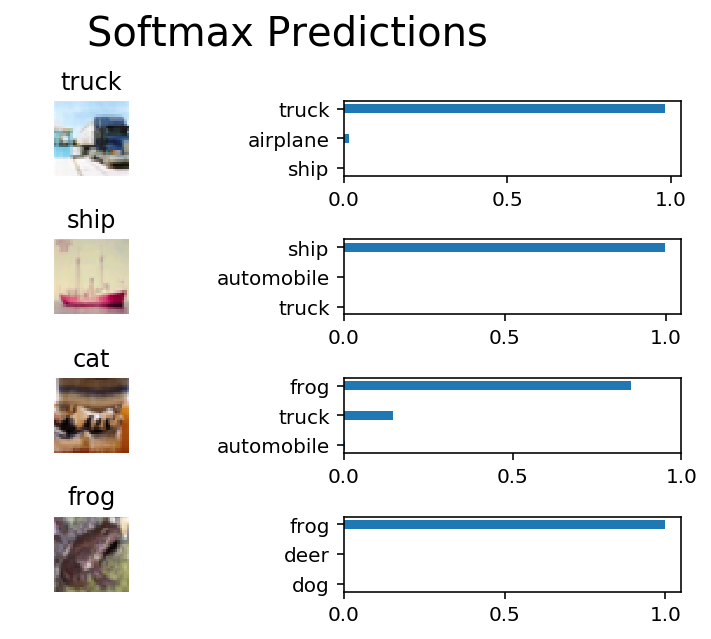

In [211]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.